In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.23234595, -0.13600606, -0.2559462 ,  0.1626021 ,  0.10239366,
         0.63785964, -0.12937337, -0.5410116 ,  0.48537046, -0.4958552 ]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.0768753 , 0.08464994, 0.07508226, 0.11410654, 0.10743911,
        0.18353221, 0.08521327, 0.05645924, 0.15757492, 0.05906717]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

1.6953652

In [8]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2949 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1427 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1068 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0888 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0733 - accuracy: 0.9768


In [10]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0761 - accuracy: 0.9760 - 818ms/epoch - 3ms/step


[0.07611175626516342, 0.9760000109672546]

In [11]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

In [12]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.01858832e-08, 7.38895056e-10, 3.68287942e-06, 1.24636019e-04,
        1.52541131e-12, 1.10886916e-07, 4.14117661e-13, 9.99870658e-01,
        2.40423024e-08, 7.59334227e-07],
       [1.20717402e-06, 2.13304476e-04, 9.99706566e-01, 7.09048181e-05,
        2.29371389e-14, 7.12180054e-06, 3.05957258e-07, 4.72041633e-12,
        4.71086224e-07, 9.86846238e-13],
       [1.46343643e-06, 9.99238968e-01, 6.77556382e-05, 5.67211919e-06,
        9.45894353e-05, 1.24843236e-05, 1.69839732e-05, 5.02688286e-04,
        5.41955633e-05, 5.17072795e-06],
       [9.99338567e-01, 4.77262603e-08, 2.69405107e-04, 3.97597114e-06,
        1.47381559e-06, 4.27697378e-05, 7.03373298e-05, 2.01104267e-04,
        4.21926700e-07, 7.19124073e-05],
       [9.11652762e-07, 9.42815825e-10, 3.74116803e-06, 6.51036700e-08,
        9.71072614e-01, 3.31131241e-06, 6.32444471e-06, 1.90767532e-04,
        3.24824299e-07, 2.87219100e-02]], dtype=float32)>

# Image classification

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 30s 7us/step


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
len(train_images)

60000

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

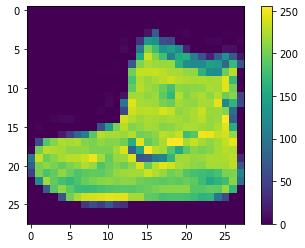

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
train_images = train_images/255.0
test_images = test_images/255.0

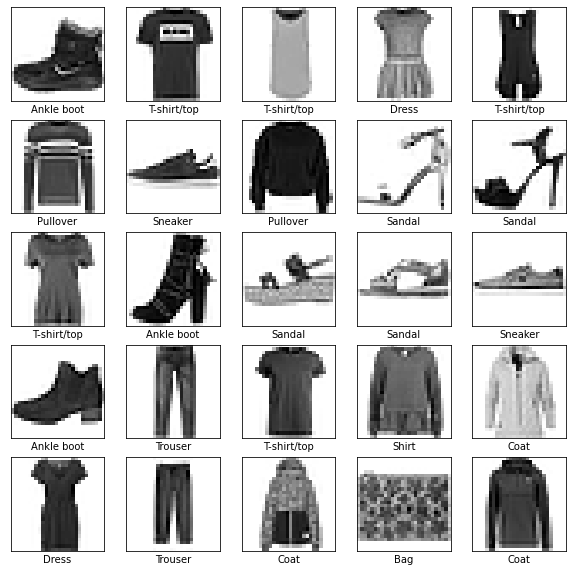

In [25]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [27]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4949 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3709 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3360 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3112 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2917 - accuracy: 0.8929: 0s - loss: 0.2913 
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2769 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2640 - accuracy: 0.9033
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2559 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2438 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 9s 5m

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3549 - accuracy: 0.8730 - 895ms/epoch - 3ms/step

Test accuracy: 0.8730000257492065


In [30]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

In [32]:
predictions[0]

array([2.2691133e-09, 4.3120013e-10, 5.7582071e-11, 1.4620779e-11,
       2.7583743e-11, 6.9535396e-05, 1.4840371e-08, 2.3569746e-02,
       1.9993998e-07, 9.7636050e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img=true_label[i], img[i]
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color="red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label])
              , color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color('blue')

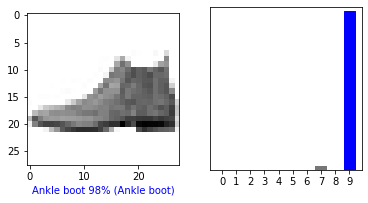

In [38]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

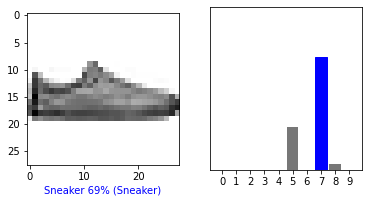

In [39]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

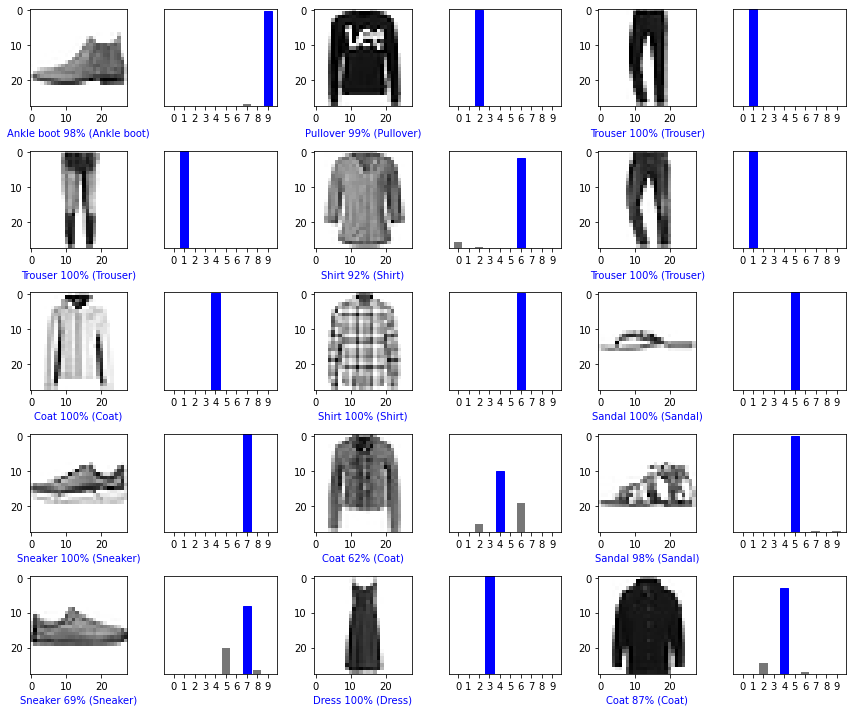

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols,  2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [41]:
img = test_images[1]
print(img.shape)

(28, 28)


In [43]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[3.98564080e-05 1.26108623e-13 9.90513086e-01 8.70306778e-12
  3.62206646e-03 1.02503795e-11 5.82493655e-03 2.14713727e-20
  2.44662850e-08 2.87779089e-11]]


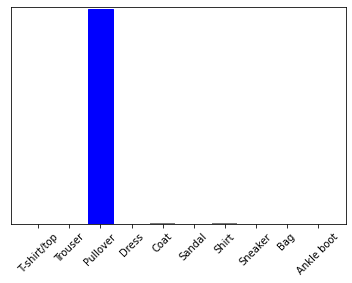

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [46]:
np.argmax(predictions_single[0])

2

# Basic text classification

In [66]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

In [67]:
print(tf.__version__)

2.7.0


In [68]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
dataset = tf.keras.utils.get_file("aclImdb_v1", 'C:/Users/jatin/aclImdb_v1.tar.gz', untar=True, cache_dir='.', 
                                  cache_subdir='')
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [69]:
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [70]:
print(dataset_dir)

.\aclImdb


In [71]:
train_dir = os.path.join(dataset_dir, "train")
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [72]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
    print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [73]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [74]:
batch_size = 32
seed = 42
raw_train_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/train', batch_size=batch_size, validation_split=0.2,
                                                         subset='training', seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [75]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print("Review", text_batch.numpy()[i])
        print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [76]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [77]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/train', batch_size=batch_size, validation_split=0.2,
                                                       subset='validation', seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [78]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/test', batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [79]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]'%re.escape(string.punctuation), '')

In [80]:
max_features = 10000
sequence_length = 250
vectorize_layer = layers.TextVectorization(standardize=custom_standardization, max_tokens=max_features, output_mode='int',
                                          output_sequence_length=sequence_length)

In [81]:
train_text = raw_train_ds.map(lambda x, y:x)
vectorize_layer.adapt(train_text)

In [84]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [85]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Belmondo is a tough cop. He goes after a big-time drug dealer (played by Henry Silva, normally a great villain - see "Sharky\'s Machine"; but here he is clearly dubbed, and because of that he lacks his usual charisma). He goes to the scuzziest places of Paris and Marseilles, asks for some names, beats up some people, gets the names, goes to more scuzzy places, asks for more names, beats up more people, etc. The whole movie is punch after punch after punch. It seems that the people who made it had no other ambition than to create the French equivalent of "Dirty Harry". Belmondo, who was 50 here, does perform some good stunts at the beginning; apart from those, "Le Marginal" is a violent, episodic, trite, shallow and forgettable cop movie. (*1/2)', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   1,    7,    4, 1234, 1021,   27,  261,  101,    4,    1, 1519,
        6984,  248,   32, 1487,    1, 1662,    4,

In [86]:
print("1287--->", vectorize_layer.get_vocabulary()[1287])
print("313--->", vectorize_layer.get_vocabulary()[313])
print("Vocabulary size: {}".format(len(vectorize_layer.get_vocabulary())))

1287---> lovely
313---> american
Vocabulary size: 10000


In [87]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [88]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [89]:
embedding_dim = 16
model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout_1 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
________________________________________________

In [90]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True), optimizer='adam', 
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [91]:
epochs = 10
history = model.fit(train_ds, validation_data = val_ds, epochs=epochs)

Epoch 1/10
625/625 [==============================] - 17s 27ms/step - loss: 0.6627 - binary_accuracy: 0.6914 - val_loss: 0.6130 - val_binary_accuracy: 0.7758
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.5483 - binary_accuracy: 0.801 - 2s 4ms/step - loss: 0.5476 - binary_accuracy: 0.8019 - val_loss: 0.4978 - val_binary_accuracy: 0.8210
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4443 - binary_accuracy: 0.8446 - val_loss: 0.4202 - val_binary_accuracy: 0.8480
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3779 - binary_accuracy: 0.8666 - val_loss: 0.3742 - val_binary_accuracy: 0.8582
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3355 - binary_accuracy: 0.8781 - val_loss: 0.3454 - val_binary_accuracy: 0.8676
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3044 - binary_accuracy: 0.8885 - val_loss: 0.3266 - val_binary_accuracy: 0.8706
Epoch 7/10
6

In [92]:
loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 44s 56ms/step - loss: 0.3098 - binary_accuracy: 0.8741
Loss:  0.30980464816093445
Accuracy:  0.8741199970245361


In [93]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

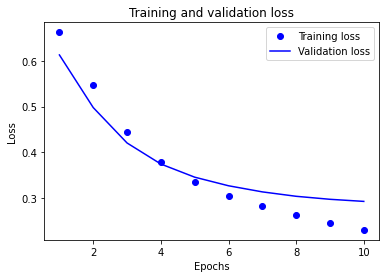

In [96]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

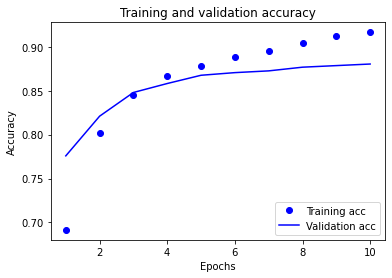

In [97]:
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")

In [99]:
export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation('sigmoid')
])
export_model.compile(loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=["accuracy"])
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 10s 12ms/step - loss: 0.3098 - accuracy: 0.8741
0.8741199970245361


In [100]:
examples = [
    "The movie was great!",
    "The movie was okay.",
    "The movie was terrible..."
]
export_model.predict(examples)

array([[0.64586747],
       [0.4710695 ],
       [0.38626814]], dtype=float32)

# Text classsification with Tensorflow Hub: Movie reviews

In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
print("Varsion", tf.__version__)
print("Eager model:", tf.executing_eagerly())
print("Hub version:", hub.__version__)
print("GPU is available" if tf.config.list_physical_devices("GPU") else "GPU not available")

Varsion 2.7.0
Eager model: True
Hub version: 0.12.0
GPU not available


In [2]:
train_data, validation_data, test_data = tfds.load(name="imdb_reviews", split=('train[:60%]', 'train[60%:]', 'test')
                                                  , as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\jatin\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [5]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [6]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)>

In [7]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [9]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])


In [11]:
history = model.fit(train_data.shuffle(10000).batch(512), epochs=10, validation_data=validation_data.batch(512), verbose=1)

Epoch 1/10
30/30 [==============================] - 27s 861ms/step - loss: 0.6617 - accuracy: 0.5334 - val_loss: 0.6099 - val_accuracy: 0.5541
Epoch 2/10
30/30 [==============================] - 26s 867ms/step - loss: 0.5446 - accuracy: 0.6856 - val_loss: 0.5022 - val_accuracy: 0.7455
Epoch 3/10
30/30 [==============================] - 26s 877ms/step - loss: 0.4098 - accuracy: 0.8220 - val_loss: 0.4007 - val_accuracy: 0.8215
Epoch 4/10
30/30 [==============================] - 26s 887ms/step - loss: 0.2943 - accuracy: 0.8879 - val_loss: 0.3452 - val_accuracy: 0.8535
Epoch 5/10
30/30 [==============================] - 26s 882ms/step - loss: 0.2155 - accuracy: 0.9242 - val_loss: 0.3176 - val_accuracy: 0.8632
Epoch 6/10
30/30 [==============================] - 26s 877ms/step - loss: 0.1598 - accuracy: 0.9487 - val_loss: 0.3071 - val_accuracy: 0.8679
Epoch 7/10
30/30 [==============================] - 26s 885ms/step - loss: 0.1179 - accuracy: 0.9666 - val_loss: 0.3064 - val_accuracy: 0.8718

In [12]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f"%(name, value))

49/49 - 6s - loss: 0.3551 - accuracy: 0.8543 - 6s/epoch - 117ms/step
loss: 0.355
accuracy: 0.854


# Basic regression: Predict fuel efficiency

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.7.0


In [34]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', "Cylinders", 'Displacement', 'Horsepower', 'Weight', 'Acceleration', "Model Year", 'Origin']
raw_dataset = pd.read_csv(url, names=column_names, na_values="?", comment='\t', sep=' ', skipinitialspace=True)

In [35]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [36]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [37]:
dataset = dataset.dropna()

In [38]:
dataset["Origin"] = dataset["Origin"].map({1:"USA", 2:'Europe', 3:'Japan'})

In [39]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [43]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [44]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
267,27.5,4,134.0,95.0,2560.0,14.2,78,0,1,0
149,24.0,4,120.0,97.0,2489.0,15.0,74,0,1,0
167,29.0,4,97.0,75.0,2171.0,16.0,75,0,1,0
341,23.5,6,173.0,110.0,2725.0,12.6,81,0,0,1
246,32.8,4,78.0,52.0,1985.0,19.4,78,0,1,0
...,...,...,...,...,...,...,...,...,...,...
89,15.0,8,318.0,150.0,3777.0,12.5,73,0,0,1
275,17.0,6,163.0,125.0,3140.0,13.6,78,1,0,0
116,16.0,8,400.0,230.0,4278.0,9.5,73,0,0,1
367,28.0,4,112.0,88.0,2605.0,19.6,82,0,0,1


In [45]:
test_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
54,35.0,4,72.0,69.0,1613.0,18.0,71,0,1,0
73,13.0,8,307.0,130.0,4098.0,14.0,72,0,0,1
83,28.0,4,98.0,80.0,2164.0,15.0,72,0,0,1
118,24.0,4,116.0,75.0,2158.0,15.5,73,1,0,0
130,26.0,4,122.0,80.0,2451.0,16.5,74,0,0,1
194,22.5,6,232.0,90.0,3085.0,17.6,76,0,0,1
195,29.0,4,85.0,52.0,2035.0,22.2,76,0,0,1
199,20.0,6,225.0,100.0,3651.0,17.7,76,0,0,1
245,36.1,4,98.0,66.0,1800.0,14.4,78,0,0,1
253,20.5,6,200.0,95.0,3155.0,18.2,78,0,0,1


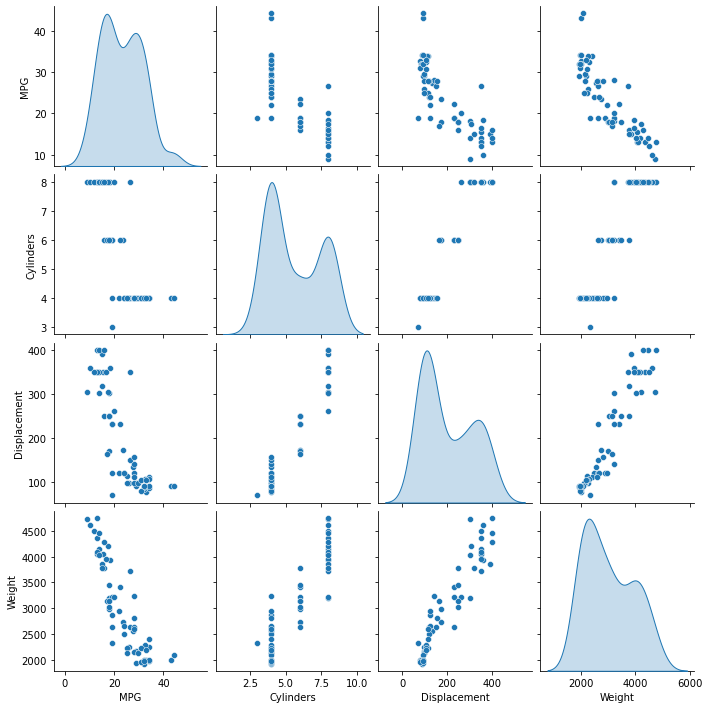

In [46]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', "Weight"]], diag_kind='kde')

In [47]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,62.0,23.190323,8.137098,9.0,16.625,22.95,29.000,44.3
Cylinders,62.0,5.596774,1.823882,3.0,4.000,4.00,8.000,8.0
Displacement,62.0,201.330645,111.930707,70.0,99.750,153.50,304.750,400.0
Horsepower,62.0,108.548387,42.420099,48.0,75.000,97.00,138.750,230.0
Weight,62.0,3023.354839,883.645487,1925.0,2228.500,2834.00,3832.750,4746.0
Acceleration,62.0,15.174194,2.687612,8.5,13.500,14.50,16.975,21.7
Model Year,62.0,76.177419,3.761427,70.0,73.000,76.00,79.000,82.0
Europe,62.0,0.161290,0.370801,0.0,0.000,0.00,0.000,1.0
Japan,62.0,0.241935,0.431751,0.0,0.000,0.00,0.000,1.0
USA,62.0,0.596774,0.494550,0.0,0.000,1.00,1.000,1.0


In [48]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop("MPG")
test_labels = test_features.pop('MPG')

In [49]:
train_dataset.describe().transpose()[["mean", "std"]]

,mean,std
MPG,23.190323,8.137098
Cylinders,5.596774,1.823882
Displacement,201.330645,111.930707
Horsepower,108.548387,42.420099
Weight,3023.354839,883.645487
Acceleration,15.174194,2.687612
Model Year,76.177419,3.761427
Europe,0.161290,0.370801
Japan,0.241935,0.431751
USA,0.596774,0.494550


In [50]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [51]:
normalizer.adapt(np.array(train_features))

In [52]:
print(normalizer.mean.numpy())

[[   5.597  201.331  108.548 3023.355   15.174   76.177    0.161    0.242
     0.597]]


In [53]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print('First example', first)
    print()
    print("Normalized", normalizer(first).numpy())

First example [[   4.   134.    95.  2560.    14.2   78.     0.     1.     0. ]]

Normalized [[-0.88 -0.61 -0.32 -0.53 -0.37  0.49 -0.44  1.77 -1.22]]


In [54]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [55]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [56]:
horsepower_model.predict(horsepower[:10])

array([[ 0.443],
       [ 0.378],
       [ 1.097],
       [-0.047],
       [ 1.849],
       [ 0.933],
       [ 0.672],
       [ 1.26 ],
       [-0.996],
       [ 1.424]], dtype=float32)

In [58]:
horsepower_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss="mean_absolute_error")

In [61]:
history = horsepower_model.fit(train_features["Horsepower"], train_labels, epochs=100, verbose=0, validation_split=0.2)

In [62]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,5.171658,8.405787,95
96,5.089650,8.266111,96
97,4.996996,8.118837,97
98,4.917924,7.960492,98
99,4.820482,7.808800,99


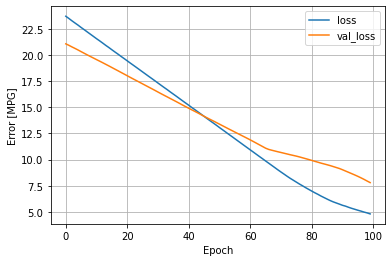

In [64]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [65]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose=0)

In [66]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

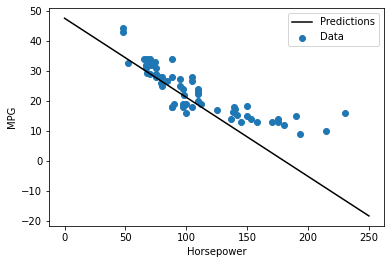

In [68]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label="Predictions")
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
plot_horsepower(x, y)

In [69]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [70]:
linear_model.predict(train_features[:10])

array([[-0.294],
       [-0.637],
       [-0.401],
       [-0.057],
       [ 0.081],
       [ 2.015],
       [ 0.146],
       [ 0.262],
       [-0.048],
       [-0.04 ]], dtype=float32)

In [71]:
linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.054],
       [ 0.475],
       [-0.207],
       [-0.28 ],
       [ 0.112],
       [ 0.308],
       [ 0.144],
       [-0.65 ],
       [-0.767]], dtype=float32)>

In [73]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss="mean_absolute_error")

In [74]:
%%time
history = linear_model.fit(train_features, train_labels, epochs=100, verbose=0, validation_split=0.2)

Wall time: 5.36 s


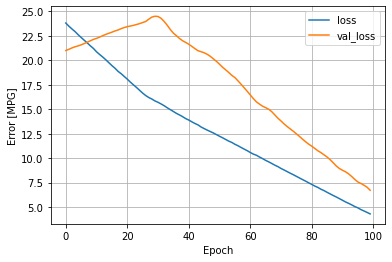

In [76]:
plot_loss(history)

In [77]:
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

# Regression with deep neural network

In [78]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(loss="mean_absolute_error", optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [79]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [80]:
dnn_horsepower_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                128       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [81]:
%%time
history = dnn_horsepower_model.fit(train_features['Horsepower'], train_labels, validation_split=0.2, verbose=0, epochs=100)

Wall time: 5.43 s


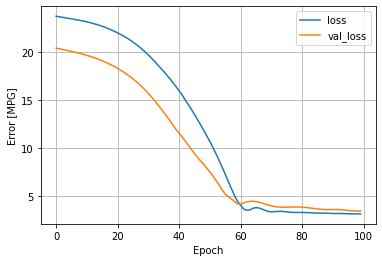

In [82]:
plot_loss(history)

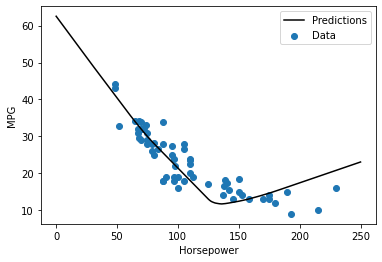

In [83]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

In [84]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose=0)

In [85]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_7 (Dense)             (None, 64)                640       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [86]:
%%time
history = dnn_model.fit(train_features, train_labels, validation_split=0.2, verbose=0, epochs=100)

Wall time: 5.41 s


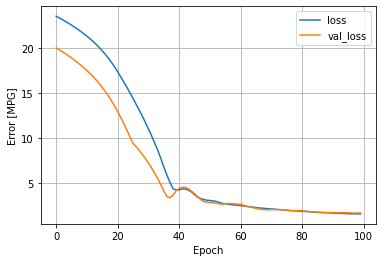

In [87]:
plot_loss(history)

In [88]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [89]:
pd.DataFrame(test_results, index=['Mean absoluet error[MPG]']).T

,Mean absoluet error[MPG]
horsepower_model,3.730312
linear_model,3.595819
dnn_horsepower_model,3.385612
dnn_model,2.473771


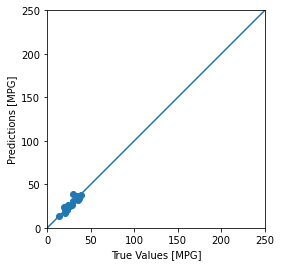

In [91]:
test_predictions = dnn_model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims=[0, 250]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)

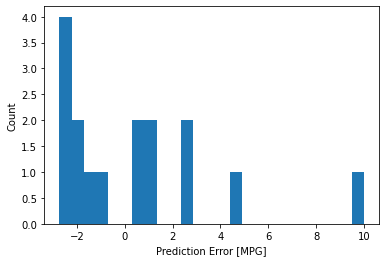

In [92]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [93]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


INFO:tensorflow:Assets written to: dnn_model\assets


In [95]:
reloaded = tf.keras.models.load_model('dnn_model')
test_results['reloaded'] = reloaded.evaluate(test_features, test_labels, verbose=0)

In [96]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.730312
linear_model,3.595819
dnn_horsepower_model,3.385612
dnn_model,2.473771
reloaded,2.473771


# Save and load models

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
print(tf.version.VERSION)

2.7.0


In [7]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_labels = train_labels[:1000]
test_labels = test_labels[:1000]
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

In [8]:
def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(512, activation="relu", input_shape=(784, )),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10)
    ])
    model.compile(optimizer="adam", loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.metrics.SparseCategoricalAccuracy()])
    return model

In [9]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Epoch 1/10
30/32 [===========================>..] - ETA: 0s - loss: 1.1636 - sparse_categorical_accuracy: 0.6740
Epoch 00001: saving model to training_1\cp.ckpt
32/32 [==============================] - 1s 26ms/step - loss: 1.1420 - sparse_categorical_accuracy: 0.6760 - val_loss: 0.6804 - val_sparse_categorical_accuracy: 0.8110
Epoch 2/10
29/32 [==========================>...] - ETA: 0s - loss: 0.4128 - sparse_categorical_accuracy: 0.8966
Epoch 00002: saving model to training_1\cp.ckpt
32/32 [==============================] - 0s 16ms/step - loss: 0.4076 - sparse_categorical_accuracy: 0.8960 - val_loss: 0.5087 - val_sparse_categorical_accuracy: 0.8520
Epoch 3/10
28/32 [=========================>....] - ETA: 0s - loss: 0.2940 - sparse_categorical_accuracy: 0.9230
Epoch 00003: saving model to training_1\cp.ckpt
32/32 [==============================] - 0s 15ms/step - loss: 0.2838 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.5042 - val_sparse_categorical_accuracy: 0.8440
Epoch 4/10
31

In [11]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [12]:
model = create_model()
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 2.3541 - sparse_categorical_accuracy: 0.0800 - 289ms/epoch - 9ms/step
Untrained model, accuracy:  8.00%


In [13]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 0.4010 - sparse_categorical_accuracy: 0.8640 - 129ms/epoch - 4ms/step
restored model, accuracy: 86.40%


In [14]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
batch_size = 32
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, 
                                                 save_freq=5*batch_size)
model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels, epochs=50, batch_size=batch_size, callbacks=[cp_callback], 
          validation_data=(test_images, test_labels), verbose=0)


Epoch 00005: saving model to training_2\cp-0005.ckpt

Epoch 00010: saving model to training_2\cp-0010.ckpt

Epoch 00015: saving model to training_2\cp-0015.ckpt

Epoch 00020: saving model to training_2\cp-0020.ckpt

Epoch 00025: saving model to training_2\cp-0025.ckpt

Epoch 00030: saving model to training_2\cp-0030.ckpt

Epoch 00035: saving model to training_2\cp-0035.ckpt

Epoch 00040: saving model to training_2\cp-0040.ckpt

Epoch 00045: saving model to training_2\cp-0045.ckpt

Epoch 00050: saving model to training_2\cp-0050.ckpt


In [15]:
os.listdir(checkpoint_dir)

['checkpoint',
 'cp-0000.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'cp-0010.ckpt.data-00000-of-00001',
 'cp-0010.ckpt.index',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.index',
 'cp-0020.ckpt.data-00000-of-00001',
 'cp-0020.ckpt.index',
 'cp-0025.ckpt.data-00000-of-00001',
 'cp-0025.ckpt.index',
 'cp-0030.ckpt.data-00000-of-00001',
 'cp-0030.ckpt.index',
 'cp-0035.ckpt.data-00000-of-00001',
 'cp-0035.ckpt.index',
 'cp-0040.ckpt.data-00000-of-00001',
 'cp-0040.ckpt.index',
 'cp-0045.ckpt.data-00000-of-00001',
 'cp-0045.ckpt.index',
 'cp-0050.ckpt.data-00000-of-00001',
 'cp-0050.ckpt.index']

In [16]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2\\cp-0050.ckpt'

In [20]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 0.4903 - sparse_categorical_accuracy: 0.8720 - 276ms/epoch - 9ms/step
Restored model, accuracy: 87.20%


In [21]:
model.save_weights('./checkpoints/my_checkpoint')
model = create_model()
model.load_weights('./checkpoints/my_checkpoint')
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 0.4903 - sparse_categorical_accuracy: 0.8720 - 274ms/epoch - 9ms/step
Restored model, accuracy: 87.20%


In [22]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)
model.save('saved_model/my_model')

Epoch 1/5
32/32 [==============================] - ETA: 0s - loss: 1.3392 - sparse_categorical_accuracy: 0.612 - 1s 7ms/step - loss: 1.2083 - sparse_categorical_accuracy: 0.6510
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 0.4354 - sparse_categorical_accuracy: 0.8740
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.2846 - sparse_categorical_accuracy: 0.9260
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 0.2259 - sparse_categorical_accuracy: 0.9430
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.1545 - sparse_categorical_accuracy: 0.9680
INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [25]:
new_model = tf.keras.models.load_model('saved_model/my_model')
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print(new_model.predict(test_images).shape)

32/32 - 0s - loss: 0.4124 - sparse_categorical_accuracy: 0.8680 - 268ms/epoch - 8ms/step
Restored model, accuracy: 86.80%
(1000, 10)


In [27]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)
model.save('my_model.h5')

Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 1.1723 - sparse_categorical_accuracy: 0.6630
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 0.4277 - sparse_categorical_accuracy: 0.8760
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 0.2982 - sparse_categorical_accuracy: 0.9120
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 0.1958 - sparse_categorical_accuracy: 0.9570
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.1451 - sparse_categorical_accuracy: 0.9740


In [28]:
new_model = tf.keras.models.load_model("my_model.h5")
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('restored model, accuracy: {:5.2f}%'.format(100 * acc))

32/32 - 0s - loss: 0.4309 - sparse_categorical_accuracy: 0.8520 - 264ms/epoch - 8ms/step
restored model, accuracy: 85.20%


# Introduction to the keras Tuner

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import keras_tuner as kt

In [3]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
img_train = img_train.astype('float32')/255.0
img_test = img_test.astype('float32') / 255.0

In [5]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    hp_units = hp.Int("units", min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation="relu"))
    model.add(keras.layers.Dense(10))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                 loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                 metrics=['accuracy'])
    return model

In [6]:
tuner = kt.Hyperband(model_builder, objective="val_accuracy", max_epochs=10, factor=3, directory='my_dir', 
                     project_name='intro_to_kt')

In [7]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [8]:
tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The hyperparameter search is complete. The optimal number of units in the first densely-connected layer \
is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}")

Trial 30 Complete [00h 01m 15s]
val_accuracy: 0.8544166684150696

Best val_accuracy So Far: 0.8860833048820496
Total elapsed time: 00h 17m 16s
INFO:tensorflow:Oracle triggered exit
The hyperparameter search is complete. The optimal number of units in the first densely-connected layer is 128 and the optimal learning rate for the optimizer is 0.001


In [9]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d'%(best_epoch,))

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5178 - accuracy: 0.8171 - val_loss: 0.4314 - val_accuracy: 0.8453
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3854 - accuracy: 0.8614 - val_loss: 0.3884 - val_accuracy: 0.8628
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3459 - accuracy: 0.8721 - val_loss: 0.3658 - val_accuracy: 0.8680
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3211 - accuracy: 0.8810 - val_loss: 0.3626 - val_accuracy: 0.8719
Epoch 5/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2991 - accuracy: 0.8891 - val_loss: 0.3404 - val_accuracy: 0.8772
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2875 - accuracy: 0.8927 - val_loss: 0.3141 - val_accuracy: 0.8872
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2722 - accuracy: 0.9002 - val_loss: 0.3185 - val_accuracy:

In [10]:
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/34
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5216 - accuracy: 0.8174 - val_loss: 0.4207 - val_accuracy: 0.8508
Epoch 2/34
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3879 - accuracy: 0.8606 - val_loss: 0.3794 - val_accuracy: 0.8595
Epoch 3/34
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3509 - accuracy: 0.8718 - val_loss: 0.3751 - val_accuracy: 0.8661
Epoch 4/34
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3242 - accuracy: 0.8824 - val_loss: 0.3441 - val_accuracy: 0.8756
Epoch 5/34
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3042 - accuracy: 0.8872 - val_loss: 0.3664 - val_accuracy: 0.8710
Epoch 6/34
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2903 - accuracy: 0.8915 - val_loss: 0.3391 - val_accuracy: 0.8788
Epoch 7/34
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2753 - accuracy: 0.8989 - val_loss: 0.3211 - val_accuracy:

In [11]:
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuarcy]:", eval_result)

313/313 [==============================] - 2s 5ms/step - loss: 0.4279 - accuracy: 0.8912
[test loss, test accuarcy]: [0.4278535544872284, 0.8912000060081482]


# Load and preprocess images

In [12]:
import numpy as np
import os
import PIL 
import PIL.Image
import tensorflow as tf
import tensorflow as tf
import tensorflow_datasets as tfds

In [13]:
print(tf.__version__)

2.7.0


In [15]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1294s 6us/step


In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


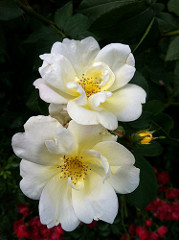

In [17]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

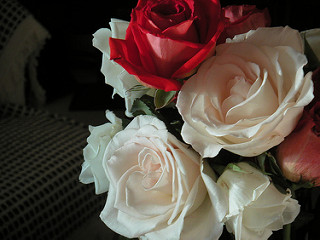

In [18]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [19]:
batch_size = 32
img_height = 180
img_width = 180

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123,
                                                       image_size = (img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123,
                                                    image_size=(img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
class_names = train_ds.class_names

In [24]:
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


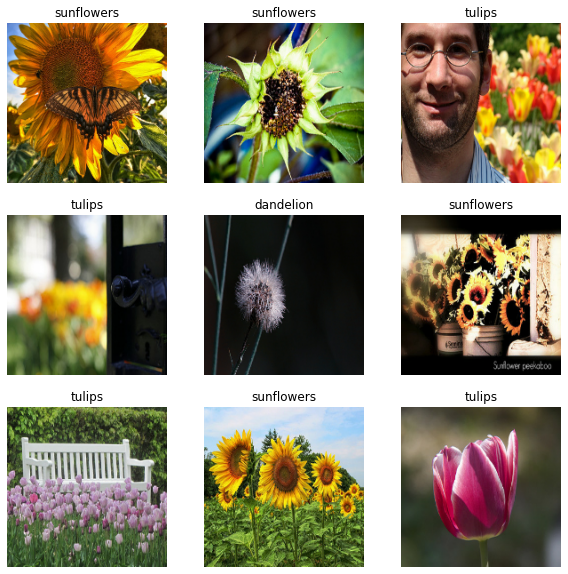

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [27]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [28]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [29]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lanels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.99638706


In [30]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [31]:
num_classes = 5
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer="adam", loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [33]:
model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
92/92 [==============================] - 97s 1s/step - loss: 1.2761 - accuracy: 0.4499 - val_loss: 1.1666 - val_accuracy: 0.5477
Epoch 2/3
92/92 [==============================] - 88s 954ms/step - loss: 1.0152 - accuracy: 0.6066 - val_loss: 0.9984 - val_accuracy: 0.6104
Epoch 3/3
92/92 [==============================] - 88s 958ms/step - loss: 0.8301 - accuracy: 0.6826 - val_loss: 0.9092 - val_accuracy: 0.6540


In [34]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [35]:
for f in list_ds.take(5):
    print(f.numpy())

b'C:\\Users\\jatin\\.keras\\datasets\\flower_photos\\sunflowers\\9302733302_2cb92cf275.jpg'
b'C:\\Users\\jatin\\.keras\\datasets\\flower_photos\\daisy\\3764116502_f394428ee0_n.jpg'
b'C:\\Users\\jatin\\.keras\\datasets\\flower_photos\\sunflowers\\15472217046_2699b25584.jpg'
b'C:\\Users\\jatin\\.keras\\datasets\\flower_photos\\tulips\\8454719295_4276c0e9c5_n.jpg'
b'C:\\Users\\jatin\\.keras\\datasets\\flower_photos\\tulips\\3011223301_09b4e3edb7.jpg'


In [36]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [37]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [39]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


In [44]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    one_hot = parts[-2] == class_names
    return tf.argmax(one_hot)

In [45]:
def decode_img(img):
    img = tf.io.decode_jpeg(img, channels=3)
    return tf.image.resize(img, [img_height, img_width])

In [46]:
def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [47]:
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [48]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("label: ", label.numpy())

Image shape:  (180, 180, 3)
label:  4


In [49]:
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds
train_ds = configure_for_performance(train_ds)
vals_ds = configure_for_performance(val_ds)

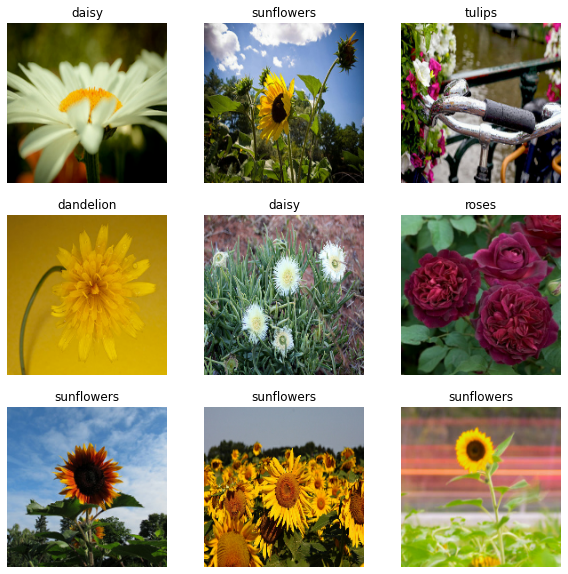

In [50]:
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    plt.title(class_names[label])
    plt.axis("off")

In [53]:
#using tensorflow

In [55]:
(train_ds, val_ds, test_ds), metadata = tfds.load('tf_flowers', split=["train[:80%]", 'train[80%:90%]', 'train[90%:]'],
                                                 with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling tf_flowers-train.tfrecord...:   0%|          | 0/3670 [00:00<?, ? examples/s]

Dataset tf_flowers downloaded and prepared to C:\Users\jatin\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [56]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


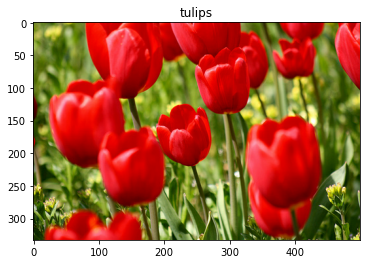

In [59]:
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [60]:
trian_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)

# csv dataset

In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
abalone_train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv", 
                           names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", 
                                  "Shell weight", "Age"])
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [4]:
abalone_train.shape

(3320, 8)

In [5]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [6]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [7]:
abalone_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
])
abalone_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam())

In [8]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 1ms/step - loss: 61.9686
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 12.3596
Epoch 3/10
104/104 [==============================] - 0s 946us/step - loss: 8.9899
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 8.3987
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 7.8789
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 7.4477
Epoch 7/10
104/104 [==============================] - ETA: 0s - loss: 7.058 - 0s 1ms/step - loss: 7.0983
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 6.8707
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 6.6910
Epoch 10/10
104/104 [==============================] - 0s 1ms/step - loss: 6.5449


In [9]:
normalize = layers.Normalization()

In [10]:
normalize.adapt(abalone_features)

In [13]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])
norm_abalone_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam())
norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 1ms/step - loss: 91.6476
Epoch 2/10
104/104 [==============================] - ETA: 0s - loss: 55.08 - 0s 1ms/step - loss: 51.9153
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 15.7563
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 5.7461
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 5.0206
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9368
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9478
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9255
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 4.8956
Epoch 10/10
104/104 [==============================] - 0s 1ms/step - loss: 4.8893


In [15]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [16]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [17]:
inputs = tf.keras.Input(shape=(), dtype=tf.float32)
result = 2 * inputs + 1
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [18]:
calc = tf.keras.Model(inputs=inputs, outputs=result)

In [19]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [20]:
inputs = {}
for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)
inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [22]:
numeric_inputs = {name:input for name, input in inputs.items() if input.dtype == tf.float32}
x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_2')>

In [23]:
preprocessed_inputs = [all_numeric_inputs]

In [24]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue
    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
    one_hot = layers.CategoryEncoding(max_tokens=lookup.vocab_size())
    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

In [25]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)
tf.keras.utils.plot_model(model = titanic_preprocessing, rankdir="LR", dpi=72, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [26]:
titanic_features_dict = {name: np.array(value) for name, value in titanic_features.items()}

In [28]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [29]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64),
        layers.Dense(1)
    ])
    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)
    model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.optimizers.Adam())
    return model
titanic_model = titanic_model(titanic_preprocessing, inputs)

In [31]:
titanic_model.fit(x = titanic_features_dict, y = titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6118
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5149
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4754
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4543
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4419
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4345
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4283
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4261
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4242
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4218


In [33]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test\assets


In [34]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.886]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.886]], shape=(1, 1), dtype=float32)


In [35]:
import itertools
def slices(features):
    for i in itertools.count():
        example = {name:values[i] for name, values in features.items()}
        yield example

In [36]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [38]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [39]:
for example in features_ds:
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [40]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [41]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [42]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 1s 12ms/step - loss: 0.4209
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4201
Epoch 3/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4197
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4212
Epoch 5/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4192


In [43]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [44]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(titanic_file_path, batch_size=5, label_name='survived', 
                                                      num_epochs=1, ignore_errors=True)

In [46]:
for batch, label in titanic_csv_ds.take(1):
    for keys, value in batch.items():
        print(f"{keys:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'male' b'male' b'female' b'female' b'female']
age                 : [20. 26. 36. 31. 28.]
n_siblings_spouses  : [0 2 0 1 3]
parch               : [0 0 2 1 1]
fare                : [ 9.5    8.663 71.    26.25  25.467]
class               : [b'Third' b'Third' b'First' b'Second' b'Third']
deck                : [b'unknown' b'unknown' b'B' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton'
 b'Southampton']
alone               : [b'y' b'n' b'n' b'n' b'n']

label               : [0 0 1 1 0]


In [47]:
traffic_volume_csv_gz = tf.keras.utils.get_file('Metro_Interstate_Traffic_Volume.csv.gz', 
                                               "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
                                               cache_dir=".", cache_subdir='traffic')

417792/405373 [==============================] - 3s 7us/step


In [48]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(traffic_volume_csv_gz, batch_size=256, 
                                                                 label_name='traffic_volume', num_epochs=1, 
                                                                compression_type="GZIP")
for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value[:5]}")
    print()
    print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [293.18 257.92 268.3  274.05 279.03]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [75 32  1 90  1]
weather_main        : [b'Clouds' b'Clouds' b'Clear' b'Rain' b'Clear']
weather_description : [b'broken clouds' b'scattered clouds' b'sky is clear' b'moderate rain'
 b'sky is clear']
date_time           : [b'2013-05-21 16:00:00' b'2013-02-07 04:00:00' b'2013-03-22 20:00:00'
 b'2013-01-11 19:00:00' b'2012-11-15 11:00:00']

label               : [6768  761 3123 3433 4811]


In [49]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
    if i % 40 == 0:
        print(".", end="")
print()

...............................................................................................
Wall time: 17.7 s


In [50]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)
for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
Wall time: 2.67 s


In [51]:
%%time
snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)
for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end="")
print()

Instructions for updating:
Use `tf.data.Dataset.snapshot(...)`.
...............................................................................................
Wall time: 3.49 s


In [57]:
import pathlib
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]
all_strings = [str()] * 10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [58]:
features = tf.io.decode_csv(lines, record_defaults=all_strings)
for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [59]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [60]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [62]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types)
for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [63]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)
for example in simple_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [64]:
def decode_titanic_line(line):
    return tf.io.decode_csv(line, titanic_types)
manual_titanic = (tf.data.TextLineDataset(titanic_file_path).skip(1).map(decode_titanic_line))
for example in manual_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


# Load Numpy array

In [66]:
import numpy as np
import tensorflow as tf

In [67]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
    train_examples = data['x_train']
    train_labels = data['y_train']
    test_examples = data['x_test']
    test_labels = data['y_test']

In [68]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [69]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["sparse_categorical_accuracy"])

In [72]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 3.0649 - sparse_categorical_accuracy: 0.8787
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5561 - sparse_categorical_accuracy: 0.9260
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4223 - sparse_categorical_accuracy: 0.9445
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3433 - sparse_categorical_accuracy: 0.9539
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3027 - sparse_categorical_accuracy: 0.9589
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2809 - sparse_categorical_accuracy: 0.9642
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2664 - sparse_categorical_accuracy: 0.9677
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2454 - sparse_categorical_accuracy: 0.9701
Epoch 9/10
938/938 [============================

In [73]:
model.evaluate(test_dataset)

157/157 [==============================] - 1s 3ms/step - loss: 0.6213 - sparse_categorical_accuracy: 0.9567


[0.6213342547416687, 0.9567000269889832]

# Load Pandas DataFrame

In [1]:
import pandas as pd
import tensorflow as tf
SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [2]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

In [3]:
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [5]:
target = df.pop('target')

In [6]:
numeric_features_names = ['age', 'thalach', 'trestbps', 'chol', 'oldpeak']
numeric_features = df[numeric_features_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [7]:
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

In [8]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)
numeric_features

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4
...,...,...,...,...,...
298,52,190,118,186,0.0
299,43,136,132,341,3.0
300,65,127,135,254,2.8
301,48,150,130,256,0.0


In [9]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93383914,  0.03480718,  0.7457807 , -0.2600867 ,  1.0680453 ],
       [ 1.3782105 , -1.7806165 ,  1.5923283 ,  0.7573879 ,  0.38022864],
       [ 1.3782105 , -0.87290466, -0.66513205, -0.3368772 ,  1.3259765 ]],
      dtype=float32)>

In [10]:
def get_basic_model():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [11]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
152/152 [==============================] - 2s 3ms/step - loss: 0.6810 - accuracy: 0.7426
Epoch 2/15
152/152 [==============================] - 1s 3ms/step - loss: 0.5886 - accuracy: 0.7459
Epoch 3/15
152/152 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7360
Epoch 4/15
152/152 [==============================] - 1s 4ms/step - loss: 0.4785 - accuracy: 0.7492
Epoch 5/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.7624
Epoch 6/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.7756
Epoch 7/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.7822
Epoch 8/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.7888
Epoch 9/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.7888
Epoch 10/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7888

In [12]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))
for row in numeric_dataset.take(3):
    print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [13]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)
model = get_basic_model()
model.fit(numeric_batches, epochs=15)

Epoch 1/15
152/152 [==============================] - 1s 3ms/step - loss: 0.7682 - accuracy: 0.6238
Epoch 2/15
152/152 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7261
Epoch 3/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7261
Epoch 4/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7294
Epoch 5/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.7459
Epoch 6/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7591
Epoch 7/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7558
Epoch 8/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.7558
Epoch 9/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.7690
Epoch 10/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7723

In [14]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))
for row in numeric_dict_ds.take(3):
    print(row)

({'age': <tf.Tensor: shape=(), dtype=int64, numpy=63>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=150>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=145>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=233>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.3>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=108>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=160>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=286>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=1.5>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=129>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=229>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.6>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [15]:
def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
        values.append(tf.cast(inputs[key], tf.float32))
    return fun(values, axis=-1)

In [16]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__(self)
        self.normalizer = tf.keras.layers.Normalization(axis=-1)
        self.seq = tf.keras.Sequential([
            self.normalizer,
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(10, activation="relu"),
            tf.keras.layers.Dense(1)
        ])
    def adapt(self, inputs):
        inputs = stack_dict(inputs)
        self.normalizer.adapt(inputs)
    def call(self, inputs):
        inputs = stack_dict(inputs)
        result = self.seq(inputs)
        return result
model = MyModel()
model.adapt(dict(numeric_features))
model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"]
              , run_eagerly=True)

In [17]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 [==============================] - 5s 33ms/step - loss: 0.6150 - accuracy: 0.7261 0s - loss: 0.6208 
Epoch 2/5
152/152 [==============================] - 5s 34ms/step - loss: 0.5274 - accuracy: 0.7261
Epoch 3/5
152/152 [==============================] - 5s 34ms/step - loss: 0.4937 - accuracy: 0.7294 0s - loss: 0.4917 - accu
Epoch 4/5
152/152 [==============================] - 5s 32ms/step - loss: 0.4731 - accuracy: 0.7459
Epoch 5/5
152/152 [==============================] - 5s 33ms/step - loss: 0.4628 - accuracy: 0.7525


In [18]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 [==============================] - 4s 29ms/step - loss: 0.4558 - accuracy: 0.7624
Epoch 2/5
152/152 [==============================] - 4s 27ms/step - loss: 0.4501 - accuracy: 0.7756
Epoch 3/5
152/152 [==============================] - 4s 28ms/step - loss: 0.4467 - accuracy: 0.7756
Epoch 4/5
152/152 [==============================] - 4s 29ms/step - loss: 0.4429 - accuracy: 0.7690
Epoch 5/5
152/152 [==============================] - 5s 32ms/step - loss: 0.4394 - accuracy: 0.7789


In [19]:
model.predict(dict(numeric_features.iloc[:3]))

array([[[0.39109027]],

       [[0.9714061 ]],

       [[0.66059756]]], dtype=float32)

In [20]:
inputs = {}
for name, column in numeric_features.items():
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=tf.float32)
inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'thalach': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'thalach')>,
 'trestbps': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'chol')>,
 'oldpeak': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'oldpeak')>}

In [21]:
x = stack_dict(inputs, fun=tf.concat)
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))
x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation="relu")(x)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, x)
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"],
             run_eagerly=True)

In [22]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [23]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 [==============================] - 5s 30ms/step - loss: 0.6305 - accuracy: 0.7261
Epoch 2/5
152/152 [==============================] - 5s 32ms/step - loss: 0.5432 - accuracy: 0.7261
Epoch 3/5
152/152 [==============================] - 5s 35ms/step - loss: 0.4946 - accuracy: 0.7261
Epoch 4/5
152/152 [==============================] - 5s 32ms/step - loss: 0.4674 - accuracy: 0.7261
Epoch 5/5
152/152 [==============================] - 5s 34ms/step - loss: 0.4529 - accuracy: 0.7393


In [24]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 [==============================] - 5s 32ms/step - loss: 0.4428 - accuracy: 0.7723
Epoch 2/5
152/152 [==============================] - 5s 34ms/step - loss: 0.4373 - accuracy: 0.7756
Epoch 3/5
152/152 [==============================] - 5s 34ms/step - loss: 0.4338 - accuracy: 0.7888
Epoch 4/5
152/152 [==============================] - 5s 32ms/step - loss: 0.4311 - accuracy: 0.7822
Epoch 5/5
152/152 [==============================] - 5s 32ms/step - loss: 0.4281 - accuracy: 0.7789


### Full Model

In [25]:
binary_feature_names = ['sex', 'fbs', 'exang']
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']

In [26]:
inputs = {}
for name, column in df.items():
    if type(column[0]) == str:
        dtype=tf.string
    elif (name in categorical_feature_names or name in binary_feature_names):
        dtype = tf.int64
    else:
        dtype = tf.float32
    inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)

In [27]:
inputs

{'age': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'age')>,
 'sex': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'sex')>,
 'cp': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'cp')>,
 'trestbps': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'chol')>,
 'fbs': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'fbs')>,
 'restecg': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'restecg')>,
 'thalach': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'thalach')>,
 'exang': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'exang')>,
 'oldpeak': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'oldpeak')>,
 'slope': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'slope')>,
 'ca': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'ca')>,
 'thal': <KerasTensor: shape=(None,) dtype=string 

In [28]:
preprocessed = []
for name in binary_feature_names:
    inp = inputs[name]
    inp = inp[:, tf.newaxis]
    float_value = tf.cast(inp, tf.float32)
    preprocessed.append(float_value)
preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>]

In [30]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

In [34]:
numeric_inputs = {}
for name in numeric_features_names:
    numeric_inputs[name] = inputs[name]
numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)
preprocessed.append(numeric_normalized)
preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'normalization_4')>]

In [36]:
vocab = ['a', 'b', 'c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c', 'a', 'a', 'b', 'zzz'])

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [37]:
vocab = [1, 4, 7, 99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')
lookup([-1, 4, 1])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

In [41]:
for name in categorical_feature_names:
    vocab = sorted(set(df[name]))
    print(f"name: {name}")
    print(f"vocab: {vocab}\n")
    if type(vocab[0]) is str:
        lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
    else:
        lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')
    x = inputs[name][:, tf.newaxis]
    x = lookup(x)
    preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



In [42]:
preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'normalization_4')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'integer_lookup_1')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_2')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_3')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'integer_lookup_4')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_5')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_6')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'string_lookup_1')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'integer_lookup_7')>]

In [43]:
preprocessed_result = tf.concat(preprocessed, axis=-1)
preprocessed_result

<KerasTensor: shape=(None, 47) dtype=float32 (created by layer 'tf.concat_1')>

In [44]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [45]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[ 1.        ,  1.        ,  0.        ,  0.93383914, -0.2600867 ,
         1.0680453 ,  0.03480718,  0.74578077,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ]], dtype=float32)>

In [46]:
body = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [47]:
inputs

{'age': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'age')>,
 'sex': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'sex')>,
 'cp': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'cp')>,
 'trestbps': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'chol')>,
 'fbs': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'fbs')>,
 'restecg': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'restecg')>,
 'thalach': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'thalach')>,
 'exang': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'exang')>,
 'oldpeak': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'oldpeak')>,
 'slope': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'slope')>,
 'ca': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'ca')>,
 'thal': <KerasTensor: shape=(None,) dtype=string 

In [49]:
x = preprocessor(inputs)
x

<KerasTensor: shape=(None, 47) dtype=float32 (created by layer 'model_1')>

In [50]:
result = body(x)
result

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sequential_3')>

In [51]:
model = tf.keras.Model(inputs, result)
model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

In [52]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 [==============================] - 2s 4ms/step - loss: 0.5580 - accuracy: 0.7261
Epoch 2/5
152/152 [==============================] - 1s 4ms/step - loss: 0.3905 - accuracy: 0.7459
Epoch 3/5
152/152 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8185
Epoch 4/5
152/152 [==============================] - 1s 4ms/step - loss: 0.3025 - accuracy: 0.8416: 0s - loss: 0.2983 - accuracy: 
Epoch 5/5
152/152 [==============================] - 1s 4ms/step - loss: 0.2955 - accuracy: 0.8350


In [53]:
ds = tf.data.Dataset.from_tensor_slices((dict(df), target))
ds = ds.batch(BATCH_SIZE)

In [54]:
import pprint
for x, y in ds.take(1):
    pprint.pprint(x)
    print()
    print(y)

{'age': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([63, 67], dtype=int64)>,
 'ca': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 3], dtype=int64)>,
 'chol': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([233, 286], dtype=int64)>,
 'cp': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 4], dtype=int64)>,
 'exang': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1], dtype=int64)>,
 'fbs': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0], dtype=int64)>,
 'oldpeak': <tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.3, 1.5])>,
 'restecg': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 2], dtype=int64)>,
 'sex': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1], dtype=int64)>,
 'slope': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 2], dtype=int64)>,
 'thal': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'fixed', b'normal'], dtype=object)>,
 'thalach': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([150, 108], dtype=int64)>,
 'tr

In [55]:
history = model.fit(ds, epochs=5)

Epoch 1/5
152/152 [==============================] - 2s 6ms/step - loss: 0.2811 - accuracy: 0.8515
Epoch 2/5
152/152 [==============================] - 1s 7ms/step - loss: 0.2735 - accuracy: 0.8482
Epoch 3/5
152/152 [==============================] - 1s 6ms/step - loss: 0.2668 - accuracy: 0.8548
Epoch 4/5
152/152 [==============================] - 1s 8ms/step - loss: 0.2595 - accuracy: 0.8581
Epoch 5/5
152/152 [==============================] - 2s 10ms/step - loss: 0.2529 - accuracy: 0.8515


# TFRecord and tf.train.Example

In [56]:
import tensorflow as tf
import numpy as np
import IPython.display as display

In [59]:
def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy()
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [60]:
print(_bytes_feature(b'test_string'))
print(_bytes_feature(u'test_bytes'.encode('utf-8')))
print(_float_feature(np.exp(1)))
print(_int64_feature(True))
print(_int64_feature(1))

bytes_list {
  value: "test_string"
}

bytes_list {
  value: "test_bytes"
}

float_list {
  value: 2.7182817459106445
}

int64_list {
  value: 1
}

int64_list {
  value: 1
}



In [61]:
feature = _float_feature(np.exp(1))
feature.SerializeToString()

b'\x12\x06\n\x04T\xf8-@'

In [62]:
n_observations = int(1e4)
feature0 = np.random.choice([False, True], n_observations)
feature1 = np.random.randint(0, 5, n_observations)
strings=np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]
feature3 = np.random.randn(n_observations)

In [66]:
def serialize_example(feature0, feature1, feature2, feature3):
    feature = {
        'feature0': _int64_feature(feature0),
        'feature1': _int64_feature(feature1),
        'feature2': _bytes_feature(feature2),
        'feature3': _float_feature(feature3)
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [67]:
sample_observation = []
serialized_example = serialize_example(False, 4, b'goat', 0.9876)
serialized_example

b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04[\xd3|?\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat'

In [68]:
example_proto = tf.train.Example.FromString(serialized_example)
example_proto

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.9876000285148621
      }
    }
  }
}

In [70]:
tf.data.Dataset.from_tensor_slices(feature1)

<TensorSliceDataset shapes: (), types: tf.int32>

In [71]:
features_dataset = tf.data.Dataset.from_tensor_slices((feature0, feature1, feature2, feature3))
features_dataset

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.bool, tf.int32, tf.string, tf.float64)>

In [72]:
for f0, f1, f2, f3 in features_dataset.take(1):
    print(f0)
    print(f1)
    print(f2)
    print(f3)

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(-1.684424149456167, shape=(), dtype=float64)


In [73]:
def tf_serialize_example(f0, f1, f2, f3):
    tf_string = tf.py_function(serialize_example, (f0, f1, f2, f3), tf.string)
    return tf.reshape(tf_string, ())

In [74]:
tf_serialize_example(f0, f1, f2, f3)

<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01\n\x13\n\x08feature2\x12\x07\n\x05\n\x03dog\n\x14\n\x08feature3\x12\x08\x12\x06\n\x046\x9b\xd7\xbf\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01'>

In [75]:
serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

<MapDataset shapes: (), types: tf.string>

In [76]:
def generator():
    for features in features_dataset:
        yield serialize_example(*features)

In [78]:
serialized_features_dataset = tf.data.Dataset.from_generator(generator, output_types=tf.string, output_shapes=())

In [79]:
serialized_features_dataset

<FlatMapDataset shapes: (), types: tf.string>

In [80]:
filename = 'test.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

Instructions for updating:
To write TFRecords to disk, use `tf.io.TFRecordWriter`. To save and load the contents of a dataset, use `tf.data.experimental.save` and `tf.data.experimental.load`


In [81]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [82]:
for raw_record in raw_dataset.take(10):
    print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x14\n\x08feature3\x12\x08\x12\x06\n\x046\x9b\xd7\xbf\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01\n\x13\n\x08feature2\x12\x07\n\x05\n\x03dog'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nR\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04Z\x94|?\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\x18"\x89>'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01\n\x13\n\x08feature2\x12\x07\n\x05\n\x03dog\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xa44\x17='>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\

In [83]:
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0)
}
def _parse_function(example_proto):
    return tf.io.parse_single_example(example_proto, feature_description)

In [84]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {feature0: (), feature1: (), feature2: (), feature3: ()}, types: {feature0: tf.int64, feature1: tf.int64, feature2: tf.string, feature3: tf.float32}>

In [85]:
for parsed_record in parsed_dataset.take(10):
    print(repr(parsed_record))

{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=-1.6844242>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'goat'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=0.98663867>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'goat'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=0.26783824>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=0.036915436>}
{'feature0': 

In [86]:
with tf.io.TFRecordWriter(filename) as writer:
    for i in range(n_observations):
        example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
        writer.write(example)

<ipython-input-59-8c4372bfcb2f>:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


In [88]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [89]:
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "dog"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: -1.6844241619110107
      }
    }
  }
}



In [90]:
result = {}
for key, feature in example.features.feature.items():
    kind = feature.WhichOneof('kind')
    result[key] = np.array(getattr(feature, kind).value)
result

{'feature2': array([b'dog'], dtype='|S3'),
 'feature0': array([1]),
 'feature3': array([-1.68442416]),
 'feature1': array([1])}

In [93]:
cat_in_snow = tf.keras.utils.get_file("320px-Felis_catus-cat_on_snow.jpg", 
                                     "https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg")
williamsburg_bridge = tf.keras.utils.get_file("194px-New_East_River_Bridge_from_Brooklun_det.4a097u.jpg",
                                             "https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg")

24576/15477 [===============================================] - 0s 0us/step


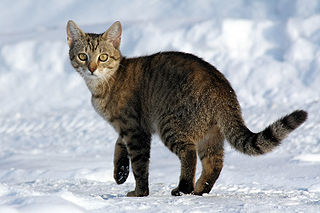

In [96]:
display.display(display.Image(filename=cat_in_snow))
# display.display(display.HTML("Image cc-by: <a "href=https://commons.wikipedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>"))

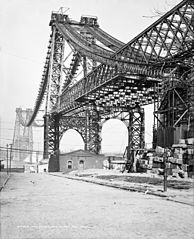

In [97]:
display.display(display.Image(filename=williamsburg_bridge))

In [100]:
image_labels = {
    cat_in_snow: 0,
    williamsburg_bridge: 1,
}

In [101]:
image_string = open(cat_in_snow, "rb").read()
label = image_labels[cat_in_snow]
def image_example(image_string, label):
    image_shape = tf.io.decode_jpeg(image_string).shape
    feature = {
        "height": _int64_feature(image_shape[0]),
        "width": _int64_feature(image_shape[1]),
        "depth": _int64_feature(image_shape[2]),
        "label": _int64_feature(label),
        "image_raw": _bytes_feature(image_string)
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))
for line in str(image_example(image_string, label)).split('\n')[:15]:
    print(line)
print('...')

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [102]:
record_file = 'image.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
    for filename, label in image_labels.items():
        image_string = open(filename, "rb").read()
        tf_example = image_example(image_string, label)
        writer.write(tf_example.SerializeToString())

In [103]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')
image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    "width": tf.io.FixedLenFeature([], tf.int64),
    "depth": tf.io.FixedLenFeature([], tf.int64),
    "label": tf.io.FixedLenFeature([], tf.int64),
    "image_raw": tf.io.FixedLenFeature([], tf.string),
}
def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

# Load Text

In [2]:
import collections
import pathlib
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization
import tensorflow_datasets as tfds

In [3]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'
dataset_dir = utils.get_file(origin=data_url, untar=True, cache_dir='stack_overflow', cache_subdir='')
dataset_dir = pathlib.Path(dataset_dir).parent

6062080/6053168 [==============================] - 8s 1us/step


In [4]:
list(dataset_dir.iterdir())

[WindowsPath('/tmp/.keras/README.md'),
 WindowsPath('/tmp/.keras/stack_overflow_16k.tar.gz'),
 WindowsPath('/tmp/.keras/test'),
 WindowsPath('/tmp/.keras/train')]

In [5]:
train_dir = dataset_dir/"train"
list(train_dir.iterdir())

[WindowsPath('/tmp/.keras/train/csharp'),
 WindowsPath('/tmp/.keras/train/java'),
 WindowsPath('/tmp/.keras/train/javascript'),
 WindowsPath('/tmp/.keras/train/python')]

In [6]:
sample_file = train_dir/'python/1755.txt'
with open(sample_file) as f:
    print(f.read())

why does this blank program print true x=true.def stupid():.    x=false.stupid().print x



In [7]:
batch_size = 32
seed = 42
raw_train_ds = utils.text_dataset_from_directory(train_dir, batch_size=batch_size, validation_split=0.2, subset="training",
                                                seed=seed)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [8]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(10):
        print("Question: ", text_batch.numpy()[i])
        print("Label:", label_batch.numpy()[i])

Question:  b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the default con

In [9]:
for i, label in enumerate(raw_train_ds.class_names):
    print("Label", i, "corresponds to", label)

Label 0 corresponds to csharp
Label 1 corresponds to java
Label 2 corresponds to javascript
Label 3 corresponds to python


In [10]:
raw_val_ds = utils.text_dataset_from_directory(train_dir, batch_size=batch_size, validation_split=0.2, subset='validation',
                                              seed=seed)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [11]:
text_dir = dataset_dir/'test'
raw_test_ds = utils.text_dataset_from_directory(text_dir, batch_size=batch_size)

Found 8000 files belonging to 4 classes.


In [12]:
VOCAB_SIZE = 10000
binary_vectorize_layer = TextVectorization(max_tokens=VOCAB_SIZE, output_mode='binary')

In [13]:
MAX_SEQUENCE_LENGTH = 250
int_vectorize_layer = TextVectorization(max_tokens=VOCAB_SIZE, output_mode='int', output_sequence_length=MAX_SEQUENCE_LENGTH
                                       )

In [14]:
train_text = raw_train_ds.map(lambda text, labels: text)
binary_vectorize_layer.adapt(train_text)
int_vectorize_layer.adapt(train_text)

In [15]:
def binary_vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return binary_vectorize_layer(text), label

In [16]:
def int_vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return int_vectorize_layer(text), label

In [18]:
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
print("Question", first_question)
print("Label", first_label)

Question tf.Tensor(b'why interface have only public member and methods this is very basic question of interview that can we declare a method as private inside interface and my answer is simple in interface we have only public variable or methods and then next question comes up... why ?\n', shape=(), dtype=string)
Label tf.Tensor(0, shape=(), dtype=int32)


In [19]:
print("'binary' vectorized question:", binary_vectorize_text(first_question, first_label)[0])

'binary' vectorized question: tf.Tensor([[0. 0. 0. ... 0. 0. 0.]], shape=(1, 10000), dtype=float32)


In [20]:
print("'int' vectorized question:", int_vectorize_text(first_question, first_label)[0])

'int' vectorized question: tf.Tensor(
[[ 111  424   17   92   22 1073    8  242   13    6  274  717  159    9
  9663   14   35  185  817    5   64   36   85  224  424    8   23  181
     6  241    7  424  185   17   92   22  116   45  242    8   87  251
   159  839  163  111    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0

In [21]:
print("1289 --->", int_vectorize_layer.get_vocabulary()[1289])
print("313 --->", int_vectorize_layer.get_vocabulary()[313])
print("Vocabulary size: {}".format(len(int_vectorize_layer.get_vocabulary())))

1289 ---> regex
313 ---> source
Vocabulary size: 10000


In [22]:
binary_train_ds = raw_train_ds.map(binary_vectorize_text)
binary_val_ds = raw_val_ds.map(binary_vectorize_text)
binary_test_ds = raw_test_ds.map(binary_vectorize_text)
int_train_ds = raw_train_ds.map(int_vectorize_text)
int_val_ds = raw_val_ds.map(int_vectorize_text)
int_test_ds = raw_test_ds.map(int_vectorize_text)

In [23]:
AUTOTUNE = tf.data.AUTOTUNE
def configure_dataset(dataset):
    return dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
binary_train_ds = configure_dataset(binary_train_ds)
binary_val_ds = configure_dataset(binary_val_ds)
binary_test_ds = configure_dataset(binary_test_ds)

int_train_ds = configure_dataset(int_train_ds)
int_val_ds = configure_dataset(int_val_ds)
int_test_ds = configure_dataset(int_test_ds)

In [27]:
binary_model = tf.keras.Sequential([layers.Dense(4)])
binary_model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
history = binary_model.fit(binary_train_ds, validation_data = binary_val_ds, epochs=10)

Epoch 1/10
200/200 [==============================] - 9s 41ms/step - loss: 1.1194 - accuracy: 0.6452 - val_loss: 0.9119 - val_accuracy: 0.7756
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.7784 - accuracy: 0.8205 - val_loss: 0.7491 - val_accuracy: 0.8006
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6272 - accuracy: 0.8595 - val_loss: 0.6640 - val_accuracy: 0.8169
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.5339 - accuracy: 0.8881 - val_loss: 0.6108 - val_accuracy: 0.8281
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4679 - accuracy: 0.9036 - val_loss: 0.5744 - val_accuracy: 0.8369
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4177 - accuracy: 0.9170 - val_loss: 0.5479 - val_accuracy: 0.8400
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3775 - accuracy: 0.9269 - val_loss: 0.5280 - val_accuracy: 0.8381
Epoch

In [30]:
def create_model(vocab_size, num_labels):
    model = tf.keras.Sequential([
        layers.Embedding(vocab_size, 64, mask_zero=True),
        layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
        layers.GlobalMaxPooling1D(),
        layers.Dense(num_labels)
    ])
    return model

In [32]:
int_model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=4)
int_model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["accuracy"])
history = int_model.fit(int_train_ds, validation_data=int_val_ds, epochs=5)

Epoch 1/5
200/200 [==============================] - 11s 51ms/step - loss: 1.1518 - accuracy: 0.4819 - val_loss: 0.7922 - val_accuracy: 0.6869
Epoch 2/5
200/200 [==============================] - 7s 33ms/step - loss: 0.6466 - accuracy: 0.7447 - val_loss: 0.5674 - val_accuracy: 0.7781
Epoch 3/5
200/200 [==============================] - 6s 32ms/step - loss: 0.3987 - accuracy: 0.8716 - val_loss: 0.5029 - val_accuracy: 0.8087
Epoch 4/5
200/200 [==============================] - 6s 32ms/step - loss: 0.2223 - accuracy: 0.9445 - val_loss: 0.5024 - val_accuracy: 0.8125
Epoch 5/5
200/200 [==============================] - 7s 33ms/step - loss: 0.1111 - accuracy: 0.9805 - val_loss: 0.5255 - val_accuracy: 0.8081


In [33]:
print("Linear model on binary vectorized data:")
print(binary_model.summary())

Linear model on binary vectorized data:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 40004     
                                                                 
Total params: 40,004
Trainable params: 40,004
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
print("CnvNet model on int vectorized data:")
print(int_model.summary())

CnvNet model on int vectorized data:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640064    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          20544     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 660,868
Trainable params: 660,868
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
binary_loss, binary_accuracy = binary_model.evaluate(binary_test_ds)
int_loss, int_accuracy = int_model.evaluate(int_test_ds)
print("Binary model accuracy: {:2.2%}".format(binary_accuracy))
print("Int model accuracy: {:2.2%}".format(int_accuracy))

250/250 [==============================] - 1s 3ms/step - loss: 0.5202 - accuracy: 0.8069
Binary model accuracy: 81.42%
Int model accuracy: 80.69%


In [37]:
export_model = tf.keras.Sequential([
    binary_vectorize_layer, binary_model, layers.Activation('sigmoid')
])
export_model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=False), optimizer='adam', metrics=["accuracy"])
loss, accuracy = export_model.evaluate(raw_test_ds)
print("Accuracy: {:2.2%}".format(binary_accuracy))

250/250 [==============================] - 3s 12ms/step - loss: 0.5187 - accuracy: 0.8142
Accuracy: 81.42%


In [38]:
def get_string_labels(predicted_scores_batch):
    predicted_int_labels = tf.argmax(predicted_scores_batch, axis=1)
    predicted_labels = tf.gather(raw_train_ds.class_names, predicted_int_labels)
    return predicted_labels

In [39]:
inputs = [
    "how do I extract keys from a dict into a list?",
    "debug public static void main(string[] args) {...}"
]
predicted_scores = export_model.predict(inputs)
predicted_labels = get_string_labels(predicted_scores)
for input, label in zip(inputs, predicted_labels):
    print("Question:", input)
    print("Predicted label:", label.numpy())

Question: how do I extract keys from a dict into a list?
Predicted label: b'python'
Question: debug public static void main(string[] args) {...}
Predicted label: b'java'


In [48]:
train_ds = tfds.load('imdb_reviews', split = 'train[:80%]', batch_size=BATCH_SIZE, shuffle_files=True, as_supervised=True)

In [49]:
val_ds = tfds.load("imdb_reviews", split='train[80%:]', batch_size=BATCH_SIZE, shuffle_files=True, as_supervised=True)

In [50]:
for review_batch, label_batch in val_ds.take(1):
    for i in range(5):
        print("Review: ", review_batch[i].numpy())
        print("Label: ", label_batch[i].numpy())

Review:  b"Instead, go to the zoo, buy some peanuts and feed 'em to the monkeys. Monkeys are funny. People with amnesia who don't say much, just sit there with vacant eyes are not all that funny.<br /><br />Black comedy? There isn't a black person in it, and there isn't one funny thing in it either.<br /><br />Walmart buys these things up somehow and puts them on their dollar rack. It's labeled Unrated. I think they took out the topless scene. They may have taken out other stuff too, who knows? All we know is that whatever they took out, isn't there any more.<br /><br />The acting seemed OK to me. There's a lot of unfathomables tho. It's supposed to be a city? It's supposed to be a big lake? If it's so hot in the church people are fanning themselves, why are they all wearing coats?"
Label:  0
Review:  b'Well, was Morgan Freeman any more unusual as God than George Burns? This film sure was better than that bore, "Oh, God". I was totally engrossed and LMAO all the way through. Carrey was

In [52]:
vectorize_layer = TextVectorization(max_tokens=VOCAB_SIZE, output_mode = 'int', output_sequence_length=MAX_SEQUENCE_LENGTH)
train_text = train_ds.map(lambda text, labels: text)
vectorize_layer.adapt(train_text)

In [53]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [54]:
train_ds = train_ds.map(vectorize_text)
val_ds = val_ds.map(vectorize_text)

In [55]:
train_ds = configure_dataset(train_ds)
val_ds = configure_dataset(val_ds)

In [57]:
model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=1)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          640064    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          20544     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 660,673
Trainable params: 660,673
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

In [59]:
history = model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
313/313 [==============================] - 11s 32ms/step - loss: 0.5434 - accuracy: 0.6597 - val_loss: 0.3740 - val_accuracy: 0.8248
Epoch 2/3
313/313 [==============================] - 10s 31ms/step - loss: 0.3010 - accuracy: 0.8666 - val_loss: 0.3145 - val_accuracy: 0.8598
Epoch 3/3
313/313 [==============================] - 10s 32ms/step - loss: 0.1854 - accuracy: 0.9271 - val_loss: 0.3202 - val_accuracy: 0.8620


In [60]:
loss, accuracy = model.evaluate(val_ds)
print("Loss: ", loss)
print("Accuracy: {:2.2%}".format(accuracy))

79/79 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.8620
Loss:  0.32017529010772705
Accuracy: 86.20%


In [61]:
export_model = tf.keras.Sequential([
    vectorize_layer, model, layers.Activation('sigmoid')
])
export_model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=False), optimizer='adam', metrics=["accuracy"])

In [64]:
inputs = [
    "This is a fantastic movie",
    "This is a bad movie",
    "This movies was so bad that it was good",
    "I will never say yes to watching this movie."
]
predicted_scores = export_model.predict(inputs)
predicted_labels = [int(round(x[0])) for x in predicted_scores]
for input, label in zip(inputs, predicted_labels):
    print("Question: ", input)
    print("Predicted label:", label)

Question:  This is a fantastic movie
Predicted label: 1
Question:  This is a bad movie
Predicted label: 0
Question:  This movies was so bad that it was good
Predicted label: 0
Question:  I will never say yes to watching this movie.
Predicted label: 0


# Unicode strings

In [66]:
import tensorflow as tf
import numpy as np

In [67]:
tf.constant(u"Thanks")

<tf.Tensor: shape=(), dtype=string, numpy=b'Thanks'>

In [68]:
tf.constant([u"Yor're", u"welcome"]).shape

TensorShape([2])

In [69]:
tf.constant([u"You're", u"welcome"])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b"You're", b'welcome'], dtype=object)>

In [71]:
batch_utf8 = [s.encode('UTF-8') for s in [u'hallo', u'what is the weather tomorroe', u"Goodnight"]]
batch_chars_ragged = tf.strings.unicode_decode(batch_utf8, input_encoding='UTF-8')
for sentence_chars in batch_chars_ragged.to_list():
    print(sentence_chars)

[104, 97, 108, 108, 111]
[119, 104, 97, 116, 32, 105, 115, 32, 116, 104, 101, 32, 119, 101, 97, 116, 104, 101, 114, 32, 116, 111, 109, 111, 114, 114, 111, 101]
[71, 111, 111, 100, 110, 105, 103, 104, 116]


In [72]:
batch_chars_padded = batch_chars_ragged.to_tensor(default_value=-1)
print(batch_chars_padded.numpy())

[[104  97 108 108 111  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [119 104  97 116  32 105 115  32 116 104 101  32 119 101  97 116 104 101
  114  32 116 111 109 111 114 114 111 101]
 [ 71 111 111 100 110 105 103 104 116  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]]


In [74]:
batch_chars_sparse = batch_chars_ragged.to_sparse()
nrows, ncols = batch_chars_sparse.dense_shape.numpy()
elements = [['_' for i in range(ncols)] for j in range(nrows)]
for (row, col), value in zip(batch_chars_sparse.indices.numpy(), batch_chars_sparse.values.numpy()):
    elements[row][col] = str(value)
value_lengths = []
for row in elements:
    for value in row:
        value_lengths.append(len(value))
max_width = max(value_lengths)
print('[%s]'%'\n'.join('[%s]'%','.join(value.rjust(max_width) for value in row) for row in elements))

[[104, 97,108,108,111,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _]
[119,104, 97,116, 32,105,115, 32,116,104,101, 32,119,101, 97,116,104,101,114, 32,116,111,109,111,114,114,111,101]
[ 71,111,111,100,110,105,103,104,116,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _,  _]]


In [78]:
tf.strings.unicode_encode([[99, 97, 116], [100, 111, 103], [99, 111, 119]], output_encoding="UTF-8")

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'cat', b'dog', b'cow'], dtype=object)>

In [80]:
tf.strings.unicode_encode(batch_chars_ragged, output_encoding='UTF-8')

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'hallo', b'what is the weather tomorroe', b'Goodnight'],
      dtype=object)>

In [81]:
tf.strings.unicode_encode(tf.RaggedTensor.from_sparse(batch_chars_sparse), output_encoding='UTF-8')

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'hallo', b'what is the weather tomorroe', b'Goodnight'],
      dtype=object)>

In [82]:
tf.strings.unicode_encode(tf.RaggedTensor.from_tensor(batch_chars_padded, padding=-1), output_encoding='UTF-8')

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'hallo', b'what is the weather tomorroe', b'Goodnight'],
      dtype=object)>

In [83]:
thanks = u'Thanks'.encode('UTF-8')
num_bytes = tf.strings.length(thanks).numpy()
num_chars = tf.strings.length(thanks, unit='UTF8_CHAR').numpy()
print("{} bytes; {} UTF-8 characters".format(num_bytes, num_chars))

6 bytes; 6 UTF-8 characters


In [86]:
tf.strings.substr(thanks, pos=5, len=1).numpy()

b's'

In [87]:
tf.strings.unicode_split(thanks, 'UTF-8').numpy()

array([b'T', b'h', b'a', b'n', b'k', b's'], dtype=object)

In [89]:
unscript = tf.strings.unicode_script([33464, 1041])
print(unscript.numpy())

[17  8]


In [90]:
print(tf.strings.unicode_script(batch_chars_ragged))

<tf.RaggedTensor [[25, 25, 25, 25, 25], [25, 25, 25, 25, 0, 25, 25, 0, 25, 25, 25, 0, 25, 25, 25, 25, 25, 25, 25, 0, 25, 25, 25, 25, 25, 25, 25, 25], [25, 25, 25, 25, 25, 25, 25, 25, 25]]>


# Word embeddings

In [1]:
import io
import os
import shutil
import re
import string
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [3]:
dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", 'C:/Users/jatin/aclImdb_v1.tar.gz', untar=True, cache_dir='.',
                                cache_subdir='')
dataset_dir = os.path.join(os.path.dirname(dataset), "aclImdb")
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [4]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [5]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [6]:
batch_size = 1024
seed = 123
train_ds = tf.keras.preprocessing.text_dataset_from_directory('aclImdb/train', batch_size=batch_size, validation_split=0.2
                                                             , subset='training', seed=seed)
val_ds = tf.keras.preprocessing.text_dataset_from_directory('aclImdb/train', seed=seed, batch_size=batch_size, 
                                                            validation_split=0.2, subset='validation')

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [7]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print(label_batch[i].numpy(), text_batch.numpy()[i])

0 b"Oh My God! Please, for the love of all that is holy, Do Not Watch This Movie! It it 82 minutes of my life I will never get back. Sure, I could have stopped watching half way through. But I thought it might get better. It Didn't. Anyone who actually enjoyed this movie is one seriously sick and twisted individual. No wonder us Australians/New Zealanders have a terrible reputation when it comes to making movies. Everything about this movie is horrible, from the acting to the editing. I don't even normally write reviews on here, but in this case I'll make an exception. I only wish someone had of warned me before I hired this catastrophe"
1 b'This movie is SOOOO funny!!! The acting is WONDERFUL, the Ramones are sexy, the jokes are subtle, and the plot is just what every high schooler dreams of doing to his/her school. I absolutely loved the soundtrack as well as the carefully placed cynicism. If you like monty python, You will love this film. This movie is a tad bit "grease"esk (without

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
embedding_layer = tf.keras.layers.Embedding(1000, 5)

In [12]:
result = embedding_layer(tf.constant([1, 2, 3]))
result.numpy()

array([[ 0.0129423 ,  0.00051502, -0.04255506, -0.02124544,  0.013351  ],
       [-0.00883158, -0.01459681,  0.00885858, -0.01468133,  0.02975452],
       [-0.03395861,  0.02711281,  0.03359004, -0.0216624 , -0.0122656 ]],
      dtype=float32)

In [13]:
result = embedding_layer(tf.constant([[0, 1, 2], [3, 4, 5]]))
result.shape

TensorShape([2, 3, 5])

In [15]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]'%re.escape(string.punctuation), '')
vocab_size = 10000
sequence_length = 100
vectorize_layer = TextVectorization(standardize=custom_standardization, max_tokens=vocab_size, output_mode='int', 
                                   output_sequence_length=sequence_length)
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [17]:
embedding_dim = 15
model = Sequential([
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding"),
    GlobalAveragePooling1D(),
    Dense(16, activation="relu"),
    Dense(1)
])

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [19]:
model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

In [20]:
model.fit(train_ds, validation_data=val_ds, epochs=15, callbacks=[tensorboard_callback])

Epoch 1/15
20/20 [==============================] - 12s 569ms/step - loss: 0.6917 - accuracy: 0.5028 - val_loss: 0.6892 - val_accuracy: 0.4886
Epoch 2/15
20/20 [==============================] - 3s 128ms/step - loss: 0.6858 - accuracy: 0.5028 - val_loss: 0.6817 - val_accuracy: 0.4886
Epoch 3/15
20/20 [==============================] - 3s 142ms/step - loss: 0.6759 - accuracy: 0.5028 - val_loss: 0.6697 - val_accuracy: 0.4886
Epoch 4/15
20/20 [==============================] - 3s 132ms/step - loss: 0.6609 - accuracy: 0.5028 - val_loss: 0.6527 - val_accuracy: 0.4886
Epoch 5/15
20/20 [==============================] - 3s 131ms/step - loss: 0.6401 - accuracy: 0.5049 - val_loss: 0.6307 - val_accuracy: 0.5008
Epoch 6/15
20/20 [==============================] - 3s 128ms/step - loss: 0.6137 - accuracy: 0.5504 - val_loss: 0.6045 - val_accuracy: 0.5656
Epoch 7/15
20/20 [==============================] - 3s 134ms/step - loss: 0.5829 - accuracy: 0.6203 - val_loss: 0.5759 - val_accuracy: 0.6268
Epoch

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 100, 15)           150000    
                                                                 
 global_average_pooling1d (G  (None, 15)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                256       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 150,273
Trainable params: 150,273
Non-trai

In [23]:
weights = model.get_layer('embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

In [25]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')
for index, word in enumerate(vocab):
    if index == 0:
        continue
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()

# Advance

# Customization basics: tensors and operations

In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow.python.distribute.merge_call_interim'